In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
dfC=pd.read_csv('calendar.csv')
dfL=pd.read_csv('listings.csv')
dfR=pd.read_csv('reviews.csv')

In [4]:
dfC.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
print('The number of columns {} and the number of rows are {}'.format(dfC.shape[1],dfC.shape[0]))

The number of columns 4 and the number of rows are 1308890


In [6]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


# The price column need to be change in data type and removing the $ sign from it 

In [31]:
dfL.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [32]:
print('The number of columns {} and the number of rows are {}'.format(dfL.shape[1],dfL.shape[0]))

The number of columns 95 and the number of rows are 3585


In [33]:
dfL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

I will drop  has availability, jurisdiction names, license and square_feet columns as  columns are empty column , and square feet barely has data ( 56 records out of 3585) and other columns like bathrooms,bedrooms,beds can give the required info

In [42]:
dfL.drop(columns=['jurisdiction_names','has_availability','jurisdiction_names','license','square_feet'],inplace=True)

In [43]:
dfL['bathrooms'].fillna(dfL['bathrooms'].mean(),inplace=True)
dfL['bedrooms'].fillna(dfL['bedrooms'].mean(),inplace=True)
dfL['beds'].fillna(dfL['beds'].mean(),inplace=True)

AS for the columns host_response_time,host_response_rate and host_acceptance_rate will be fill with mode since they are a categorical variables

In [46]:
dfL['host_response_time'].fillna(dfL['host_response_time'].mode()[0],inplace=True)
dfL['host_response_rate'].fillna(dfL['host_response_rate'].mode()[0],inplace=True)
dfL['host_acceptance_rate'].fillna(dfL['host_acceptance_rate'].mode()[0],inplace=True)

In [47]:
dfL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

handeling DF calendar price by converting data type into float and removing $ sign from it 

In [51]:
def convert_price(df):
    '''
    summary : function will clean the price column by removing the dollar sign
              and convert it to float 
              
    Input: peice column from calendar that it's needed to clean the price in it
    
    Output : df with Cleaned price ( $ ,",") characters are removed
    
     '''
    df['price']=df['price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
    return df

In [56]:
convert_price(dfC)
dfC.tail(50)

,listing_id,date,available,price
1308840,14504422,2016-10-25,t,65.0
1308841,14504422,2016-10-24,t,65.0
1308842,14504422,2016-10-23,t,65.0
1308843,14504422,2016-10-22,t,65.0
1308844,14504422,2016-10-21,t,65.0
1308845,14504422,2016-10-20,t,65.0
1308846,14504422,2016-10-19,t,65.0
1308847,14504422,2016-10-18,t,65.0
1308848,14504422,2016-10-17,t,65.0
1308849,14504422,2016-10-16,t,65.0


Now will devide the data into month and years columns for the calender data frame and replacing the avilabilty columns with 1 for True 0 for False

In [59]:
dfC['available'].replace({'t':1,'f':0},inplace=True)
dfC['month']=pd.DatetimeIndex(dfC['date']).month
dfC['year']=pd.DatetimeIndex(dfC['date']).year
dfC['Month_Year'] = pd.to_datetime(dfC['date']).dt.to_period('M')

dfC.head()

,listing_id,date,available,price,month,year,Month_Year
0,12147973,2017-09-05,0,NaN,9,2017,2017-09
1,12147973,2017-09-04,0,NaN,9,2017,2017-09
2,12147973,2017-09-03,0,NaN,9,2017,2017-09
3,12147973,2017-09-02,0,NaN,9,2017,2017-09
4,12147973,2017-09-01,0,NaN,9,2017,2017-09


In [60]:
convert_price(dfL)
dfL.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,within an hour,100%,100%,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",250.0,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston

# Data modeling and insight 

# what is the most busys month  in terms of availbility of offeres ?

,month,avg_availability
0,1,0.568348
1,2,0.565792
11,12,0.548702
10,11,0.547388
7,8,0.499802
2,3,0.496384
6,7,0.494423
5,6,0.490156
4,5,0.482162
3,4,0.477617


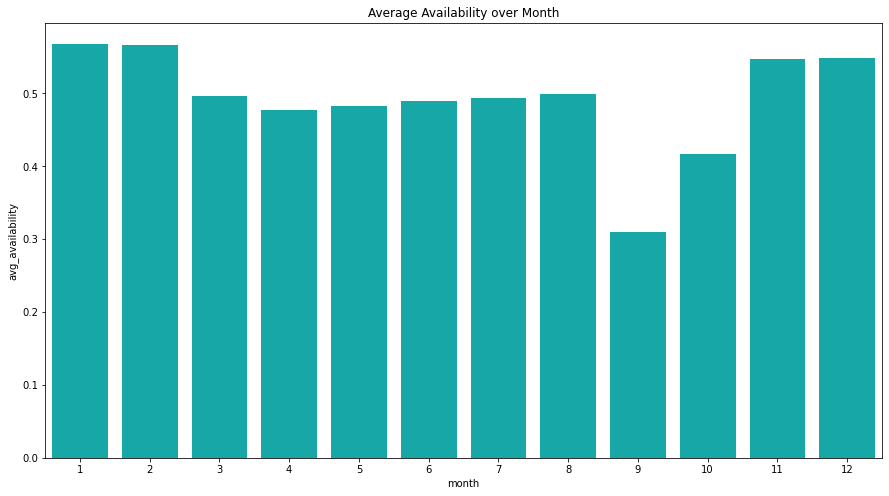

In [78]:
availibe=dfC.groupby('month')['available'].mean().reset_index().rename(columns={'available':'avg_availability'})

x=availibe['month']
y=availibe['avg_availability']

#availibility.plot()
plt.figure(figsize=(15,8))
plt.title('Average Availability over Month')

sns.barplot(data=availibe,x='month',y='avg_availability',color='c',palette=None)
availibe.sort_values(by='avg_availability',ascending=False)

through this diagram we can find out that the most busy months is from November until February we can assumem that becuse of holiday's 

# which neighborhood is the most expensive\cheapest throw the offeres we have in Boston?

,neighbourhood,avg_price
0,Harvard Square,359.000000
1,Financial District,283.692308
2,Downtown Crossing,273.500000
3,Leather District,245.875000
4,Back Bay,245.457045


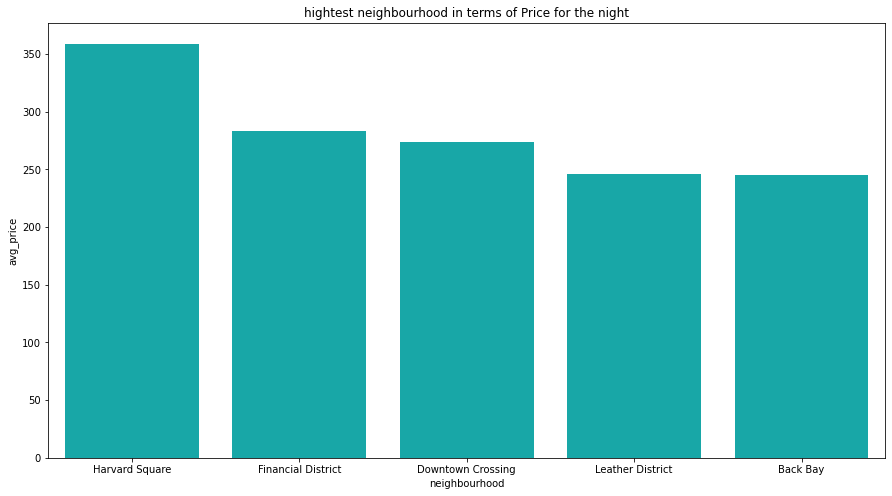

In [71]:
most_exp=dfL.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index().rename(columns={'price':'avg_price'})

x=most_exp['neighbourhood'].head(5)
y=most_exp['avg_price'].head(5)

plt.figure(figsize=(15,8))
plt.title("hightest neighbourhood in terms of Price for the night")
sns.barplot(data=most_exp,x=x,y=y,color='c',palette=None)
most_exp.head(5)

,neighbourhood,avg_price
0,Chestnut Hill,70.750000
1,Mattapan,72.000000
2,Somerville,93.076923
3,Hyde Park,93.680000
4,Dorchester,97.451282


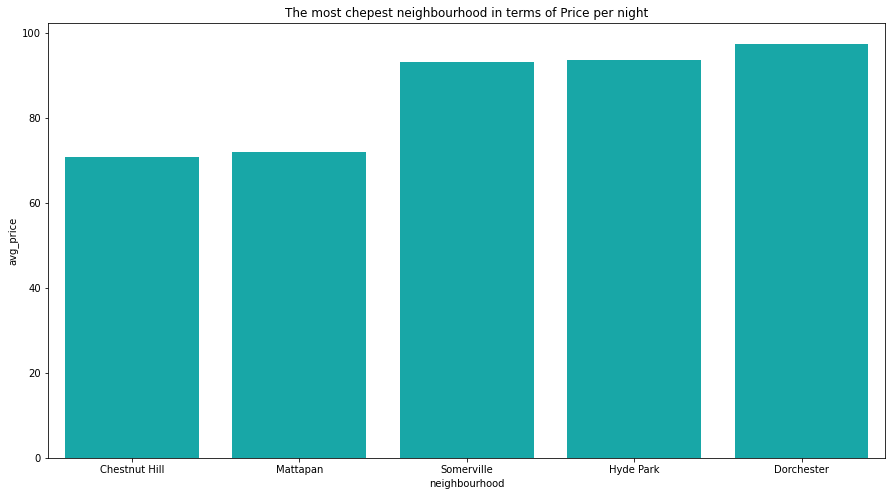

In [74]:
most_chep =dfL.groupby('neighbourhood')['price'].mean().sort_values(ascending=True).reset_index().rename(columns={'price':'avg_price'})

x=most_chep['neighbourhood'].head(5)
y=most_chep['avg_price'].head(5)

plt.figure(figsize=(15,8))
plt.title("The most chepest neighbourhood in terms of Price per night")
sns.barplot(data=most_chep,x=x,y=y,color='c',palette=None)
most_chep.head(5)

So from the two figure up we can see that 'Harvard Square' is the most expensive neighbourhood as for the chepest neighbourhood is 'Chestnut Hill' in Boston 

# when is the highest average price of offers per night ?

,month,avg_price
8,9,237.047727
9,10,233.416248
7,8,203.330142
10,11,202.924416
6,7,202.486309
3,4,197.252890
5,6,196.535302
4,5,193.712295
11,12,192.601915
0,1,182.799671


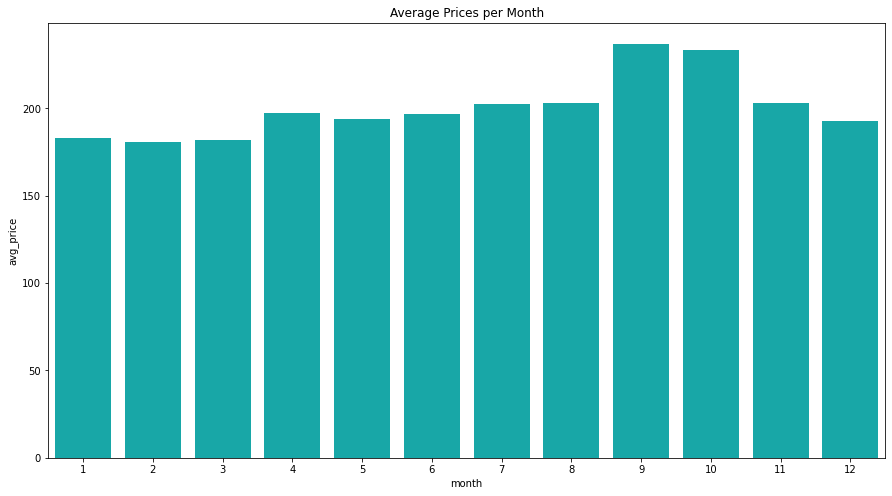

In [77]:
avg_pr=dfC.groupby('month')['price'].mean().reset_index().rename(columns={'price':'avg_price'})

x=avg_pr['month']
y=avg_pr['avg_price']

plt.figure(figsize=(15,8))
plt.title("Average Prices per Month")
sns.barplot(data=avg_pr,x='month',y='avg_price',color='c',palette=None)
avg_pr.sort_values(by='avg_price',ascending=False)